In [17]:
from matplotlib import pyplot as plt
import numpy as np

In [18]:
# length width and type ( 0 or 1 for blue or red) --> the type is the output value
data = [[3, 1.5, 1],
       [2, 1, 0],
       [4, 1.5, 1],
       [3, 1, 0],
       [3.5, 0.5, 1],
       [2, 0.5, 0],
       [5.5, 1, 1],
       [1, 1, 0]]

test_flower = [4.5, 1]

In [20]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

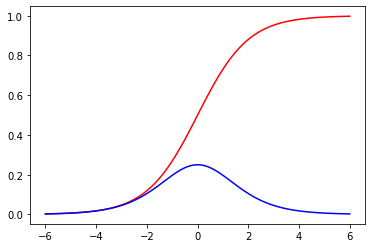

In [21]:
#visualizing sigmoid and its der
T = np.linspace(-6, 6, 100)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='b')

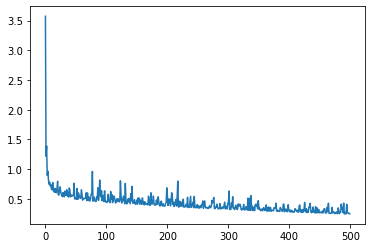

In [49]:
# training loop, using a stochastic approach

learning_rate = 0.2
costs = []

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for i in range(50000):
    rand_index = np.random.randint(len(data))
    point = data[rand_index]

    z = point[0] * w1 + point[1]*w2 + b
    a = sigmoid(z)
    
    target = point[2]
    cost = np.square(a-target) # loss function is squared error
    
    # print the cost over all data points every 1k iters
    if i % 100 == 0:
        c = 0
        for j in range(len(data)):
            p = data[j]
            p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
            c += np.square(p_pred - p[2])
        costs.append(c)
        
    dcost_da = 2*(a-target) # doh c by doh a
    da_dz = sigmoid_p(z) 
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    dcost_dz = dcost_da * da_dz
    
    #chain ruling shite
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
    
    #updating stuff
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
plt.plot(costs)
#spikes of high cost prolly coming from those points directly on the decision boundary made by the algo

In [50]:
import os

In [51]:
os.system("say hi")

0

In [53]:
# predict what the myster flower is!

z = w1 * test_flower[0] + w2 * test_flower[1] + b
pred = sigmoid(z)

print(pred)
print("close to 0 -> blue, close to 1 -> red")

0.9998485239211072
close to 0 -> blue, close to 1 -> red


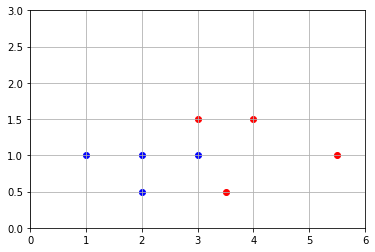

In [54]:
#Visualizing data

def vis_data():
    plt.axis([0, 6, 0 ,3])
    plt.grid()
    for i in range(len(data)):
        point  = data[i]
        color = 'r'
        if point[2] == 0:
            color = 'b'
        plt.scatter(point[0], point[1], c=color)